In [33]:
import pyreadstat
import pandas as pd
import numpy as np

datafile = '/home/matt/data/Student_Math/1ResearchProjectData.sav'
df, meta = pyreadstat.read_sav(datafile)
print(meta.variable_value_labels)
df.dropna(inplace=True)  # remove last index because it has NaN values
df.rename(columns={'wesson': 'Method'}, inplace=True)  # change wesson to Method where 1 is traditional and 0 is standards-based
df

{'Teacher': {1.0: 'Ruger', 2.0: 'Smith', 3.0: 'Wesson'}, 'Gender': {1.0: 'Female', 2.0: 'Male'}, 'Ethnic': {1.0: 'Asian', 2.0: 'African-American', 3.0: 'Hispanic', 4.0: 'Caucasian'}, 'Freeredu': {1.0: 'Free lunch', 2.0: 'Paid lunch'}, 'wesson': {0.0: 'Ruger_Smith', 1.0: 'Wesson'}}


,Student,Teacher,Gender,Ethnic,Freeredu,Score,Method
0,1.0,1.0,1.0,1.0,1.0,76.0,0.0
1,2.0,1.0,1.0,3.0,2.0,56.0,0.0
2,3.0,1.0,1.0,2.0,1.0,34.0,0.0
3,4.0,1.0,1.0,1.0,2.0,59.0,0.0
4,5.0,1.0,2.0,3.0,1.0,73.0,0.0
...,...,...,...,...,...,...,...
211,212.0,3.0,2.0,2.0,2.0,56.0,1.0
212,213.0,3.0,2.0,3.0,1.0,94.0,1.0
213,214.0,3.0,2.0,3.0,2.0,91.0,1.0
214,215.0,3.0,1.0,2.0,2.0,53.0,1.0


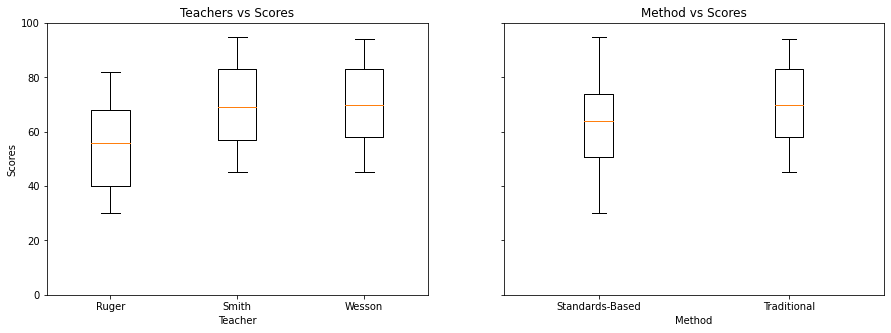

In [39]:
import matplotlib.pyplot as plt

tvs_data = [df.loc[df['Teacher'] == i+1]['Score'].to_numpy() for i in range(df['Teacher'].nunique())]
mvs_data = [df.loc[df['Method'] == i]['Score'].to_numpy() for i in range(df['Method'].nunique())]

fig, axs = plt.subplots(1,2, sharey=True, figsize=(15,5))
axs[0].boxplot(tvs_data, labels=meta.variable_value_labels['Teacher'].values())
axs[0].set_title('Teachers vs Scores')
axs[0].set_ylabel('Scores')
axs[0].set_ylim(bottom=0, top=100)
axs[0].set_xlabel('Teacher')

axs[1].boxplot(mvs_data, labels=['Standards-Based', 'Traditional'])
axs[1].set_title('Method vs Scores')
axs[1].set_xlabel('Method')

plt.show()

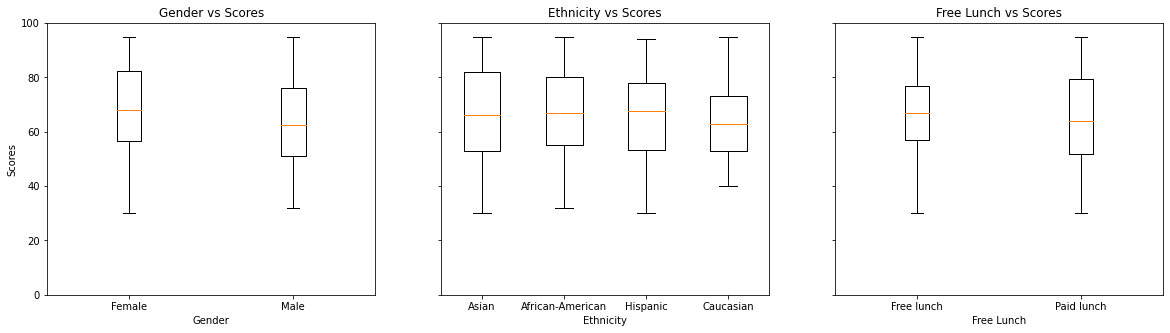

In [40]:
gvs_data = [df.loc[df['Gender'] == i+1]['Score'].to_numpy() for i in range(df['Gender'].nunique())]
evs_data = [df.loc[df['Ethnic'] == i+1]['Score'].to_numpy() for i in range(df['Ethnic'].nunique())]
fvs_data = [df.loc[df['Freeredu'] == i+1]['Score'].to_numpy() for i in range(df['Freeredu'].nunique())]


fig, axs = plt.subplots(1,3, sharey=True, figsize=(20,5))
axs[0].boxplot(gvs_data, labels=meta.variable_value_labels['Gender'].values())
axs[0].set_title('Gender vs Scores')
axs[0].set_ylabel('Scores')
axs[0].set_ylim(bottom=0, top=100)
axs[0].set_xlabel('Gender')

axs[1].boxplot(evs_data, labels=meta.variable_value_labels['Ethnic'].values())
axs[1].set_title('Ethnicity vs Scores')
axs[1].set_xlabel('Ethnicity')

axs[2].boxplot(fvs_data, labels=meta.variable_value_labels['Freeredu'].values())
axs[2].set_title('Free Lunch vs Scores')
axs[2].set_xlabel('Free Lunch')
plt.show()

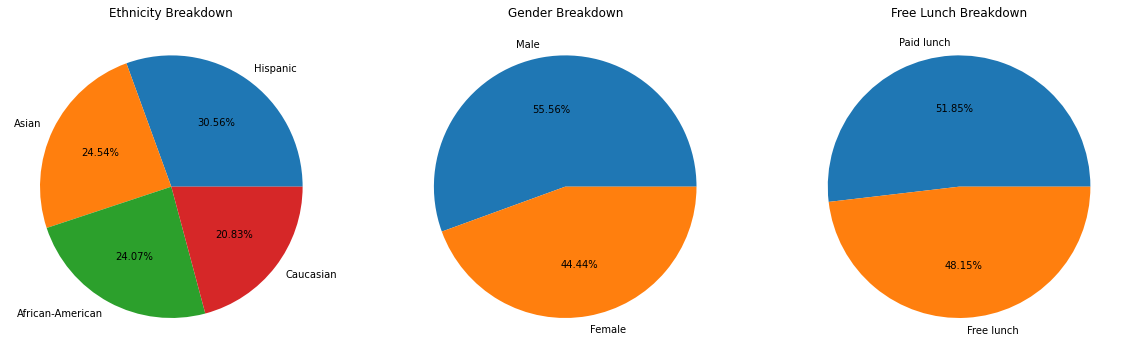

In [88]:
ethnic_split = dict(df['Ethnic'].value_counts())
ethnic_split = {meta.variable_value_labels['Ethnic'][k] : v for k, v in ethnic_split.items()}

gender_split = dict(df['Gender'].value_counts())
gender_split = {meta.variable_value_labels['Gender'][k] : v for k, v in gender_split.items()}

freere_split = dict(df['Freeredu'].value_counts())
freere_split = {meta.variable_value_labels['Freeredu'][k] : v for k, v in freere_split.items()}

fig, axs = plt.subplots(1, 3, figsize=(20,10))
axs[0].pie(list(ethnic_split.values()), labels=list(ethnic_split.keys()), autopct='%.2f%%')
axs[0].set_title('Ethnicity Breakdown')

axs[1].pie(list(gender_split.values()), labels=list(gender_split.keys()), autopct='%.2f%%')
axs[1].set_title('Gender Breakdown')

axs[2].pie(list(freere_split.values()), labels=list(freere_split.keys()), autopct='%.2f%%')
axs[2].set_title('Free Lunch Breakdown')
plt.show()

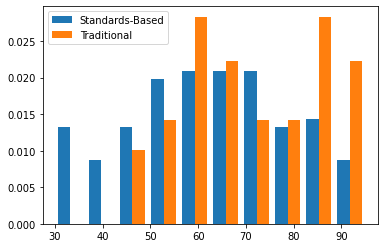

In [61]:
mvs_data = [df.loc[df['Method'] == i]['Score'].to_numpy() for i in range(df['Method'].nunique())]

plt.hist(mvs_data, density=True, label=['Standards-Based', 'Traditional'])
plt.legend()
plt.show()

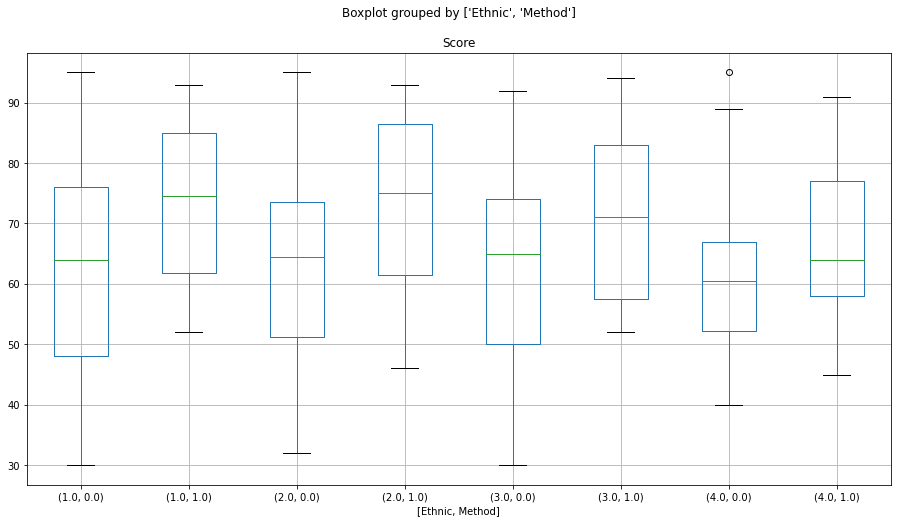

In [84]:
# df_list = [df.groupby(['Ethnic', 'Method']).get_group((i, j))['Score'].to_numpy() for i in range(1, df['Ethnic'].nunique()+1) for j in range(df['Method'].nunique())]

df.boxplot(column='Score', by=['Ethnic', 'Method'], figsize=(15,8))
plt.show()

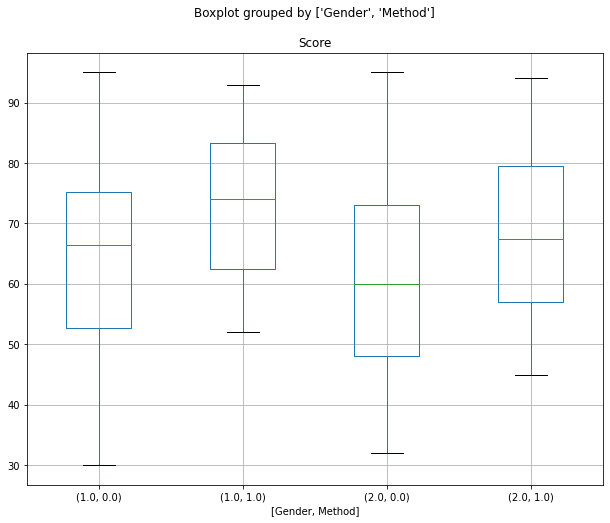

In [87]:
df.boxplot(column='Score', by=['Gender', 'Method'], figsize=(10,8))
plt.show()